# Fourier interpolation using FFT

In [1]:
%matplotlib inline
%config InlineBackend.figure_format='svg'

from numpy import pi,zeros,arange,exp,sin,abs,linspace,dot,outer,real
from numpy.fft import fft
import matplotlib.pyplot as plt

In [2]:
# Wave numbers are arranged as k=[0,1,...,N/2,-N/2+1,-N/2,...,-1]
def fourier_interp(N,f,ne=100):
    h = 2*pi/N; x = h*arange(0,N);

    v = f(x);
    v_hat = fft(v)
    k = zeros(N)
    k[0:N/2+1] = arange(0,N/2+1)
    k[N/2+1:] = arange(-N/2+1,0,1)

    xx = linspace(0.0,2*pi,ne)
    vf = real(dot(exp(1j*outer(xx,k)), v_hat)/N)
    ve = f(xx)

    plt.plot(x,v,'o',xx,vf,xx,ve)
    plt.legend(('Data','Fourier','Exact'))

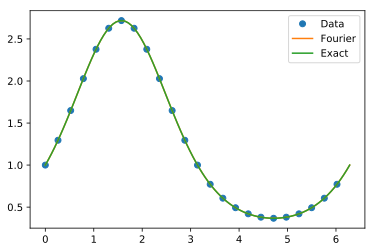

In [3]:
f1 = lambda x: exp(sin(x))
fourier_interp(24,f1)

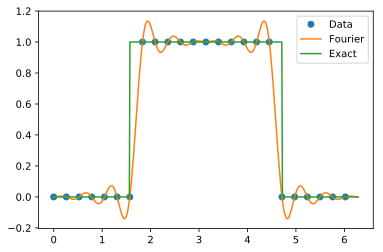

In [4]:
f2 = lambda x: (abs(x-pi) < 0.5*pi)
fourier_interp(24,f2,500)